<a href="https://colab.research.google.com/github/au950021104031/Technohacks-internship/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 0s 238ms/step


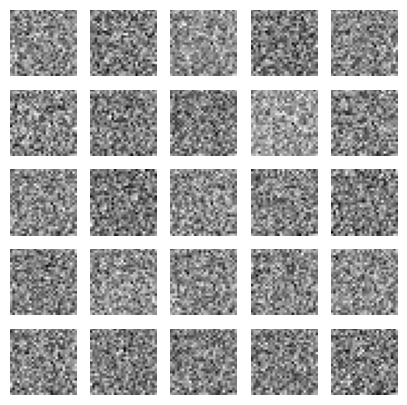

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

# Load the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

# Rescale the images to be between -1 and 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape the images to be (28, 28, 1)
X_train = np.expand_dims(X_train, axis=3)

# Set the random seed
np.random.seed(42)

# Set the image dimensions
img_rows, img_cols, channels = 28, 28, 1

# Set the optimizer
optimizer = Adam(0.0002, 0.5)

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(img_rows, img_cols, channels)))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define the generator model
generator = Sequential()
generator.add(Dense(256, input_dim=100))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(np.prod((img_rows, img_cols, channels)), activation='tanh'))
generator.add(Reshape((img_rows, img_cols, channels)))

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

# Train the GAN
epochs = 50
batch_size = 32
gan_train = np.zeros((batch_size, img_rows, img_cols, channels))

for epoch in range(epochs):
    for batch in range(int(X_train.shape[0] / batch_size)):
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
        X = np.concatenate((image_batch, gan_train))
        y = np.concatenate((np.ones((batch_size, 1)), np.zeros((batch_size, 1))))
        d_loss = discriminator.train_on_batch(X, y)
        y = np.ones((batch_size, 1))
        noise = np.random.normal(0, 1, size=(batch_size, 100))


# Generate new samples
noise = np.random.normal(0, 1, size=(25, 100))
generated_images = generator.predict(noise)

# Rescale the generated images to be between 0 and 1
generated_images = 0.5 * generated_images + 0.5

# Print the generated images
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(5, 5), sharey=True, sharex=True)
cnt = 0
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        cnt += 1
plt.show()